In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
X=df.drop('sales' , axis=1)
y=df['sales']

# Preprocessing

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
polynomial_converter=PolynomialFeatures(degree=2 , include_bias=False)

In [13]:
#polynomial_converter.fit(X)
#polynomial_converter.transform(X)
poly_features=polynomial_converter.fit_transform(X)

In [15]:
poly_features.shape

(200, 9)

In [17]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [25]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [27]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [29]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

# ِData classification to train & test

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
 X_train, X_test, y_train, y_test = train_test_split( poly_features, y, test_size=0.3, random_state=101)

In [23]:
X_train.shape

(140, 9)

# Implementation LinearRegression Model

In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression(fit_intercept=True)

In [31]:
model.fit(X_train , y_train)

LinearRegression()

In [56]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [58]:
model.intercept_

5.125557423132571

In [33]:
test_prediction=model.predict(X_test)

# Evaluating Regression

In [63]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [69]:
MAE=mean_absolute_error(test_prediction , y_test)
MAE

0.48967980448037096

In [71]:
MSE=mean_squared_error(test_prediction , y_test)
MSE

0.44175055104035904

In [73]:
RMSE=np.sqrt(MSE)
RMSE

0.6646431757269152

In [75]:
df['sales'].mean()

14.0225

# Residual Error

In [35]:
test_res=test_prediction - y_test

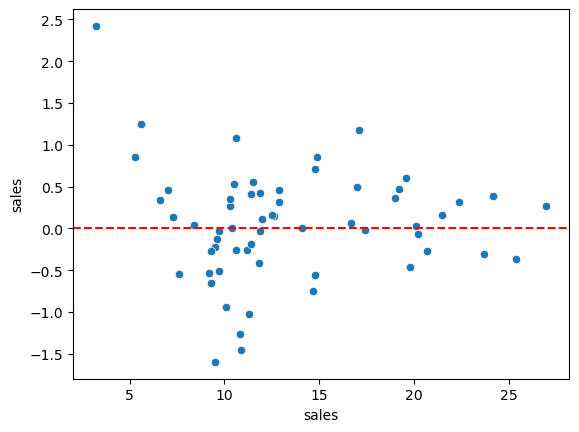

In [37]:
sns.scatterplot(x=y_test , y=test_res)
plt.axhline(y=0 , color='red' , ls='--')

<Axes: xlabel='sales', ylabel='Density'>

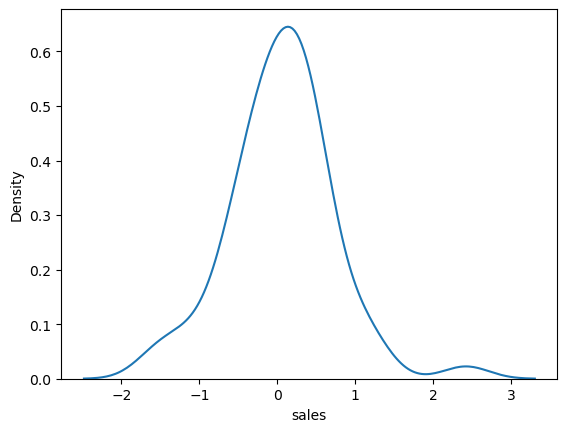

In [39]:
sns.kdeplot(test_res)